# Etapas
1. Entendimento do Problema;
2. Entendimento dos Dados;
3. Tratamento dos Dados;
4. Análise Exploratória de Dados;
5. Criação das Pipelines para a Modelagem de Diferentes Algorítmos de Classificação com GridSearchCV;
6. Avaliando o Modelo: Sumários, métricas e conclusões.

# 1. Entendimento do Problema


### Análise de Sentimento em Tweets Utilizando o Dataset Sentiment140

O crescimento das redes sociais transformou a maneira como as pessoas se comunicam e compartilham opiniões. O Twitter, em particular, se tornou uma plataforma significativa para expressar pensamentos sobre diversos assuntos em tempo real. Analisar o sentimento dessas postagens pode oferecer insights valiosos para empresas, pesquisadores e desenvolvedores de políticas.

O objetivo deste projeto é construir um modelo de aprendizado de máquina para classificar o sentimento de tweets como posi ouivo, negautro utilizando o dataset Sentiment140. Além disso, pretende-se analisar as tendências de sentimento ao longo do tempo ou em resposta a eventos específicos.

O dataset Sentiment140 contém 1,6 milhões de tweets, anotados automaticamente para sentimento com base nos emoticons presentes nas postagens. Cada tweet é rotulado como po ouitivo, ne.eutro.

- Fonte: Sentiment140 - Kaggle
- Tamanho: 1,6 milhões de tweets
- Atributos Principais:
  - Sentimento: Indica o sentimento do tweet (0 = negativo, 4 = positivo)
  - ID do Tweet: Identificador único do tweet
  - Data: Data e hora da postagem do tweet
  - Texto do Tweet: O conteúdo textul da postagem


### Metodologia
**1. Coleta e Pré-processamento de Dados**
- Coleta de Dados: Utilizar o dataset Sentiment140 obtido do Kaggle.
- Limpeza dos Dados: Remoção de URLs, menções, hashtags e caracteres especiais.
- Tokenização: Divisão dos tweets em palavras individuais.
- Normalização: Aplicação de técnicas de stemming e lemmatization.

**2. Transformação dos Dados Textuais**
- Vetorização: Conversão dos textos em representações numéricas utilizando métodos como TF-IDF.

**3. Modelagem**
- Treinamento de Modelos: Utilização de algoritmos de classificação, como Naive Bayes, SVM,
- Avaliação: Medição do desempenho dos modelos utilizando métricas como acurácia, precisão, recall e F1-score.

**4. Análise de Tendências**
- Tendências Temporais: Análise do sentimento ao longo do tempo para identificar mudanças ou padrões em resposta a eventos específicos.
- Visualização: Criação de gráficos e visualizações interativas para comunicar os resultados.

**5. Ferramentas Utilizadas**
- Linguagem de Programação: Python
- Bibliotecas: Pandas, NLTK, Scikit-learn, TensorFlow, Keras, Matplotlib, Seaborn


### Dicionário de Dados para o Dataset Sentiment140

| Variável | Descrição |
| -------- | --------- |
| `target` | A polaridade do sentimento do tweet, representada como um número inteiro. Valores possíveis: 0 (negativo), 4 (positivo). |
| `ids` | O identificador único do tweet. Este é um valor numérico. |
| `date` | A data e hora em que o tweet foi postado, no formato "Dia Mês DD HH:MM:SS UTC YYYY". Exemplo: "Sáb Mai 16 23:58:44 UTC 2009". |
| `flag` | A consulta utilizada para encontrar o tweet. Se nenhuma consulta foi utilizada, este valor é "NO_QUERY". |
| `user` | O nome de usuário do usuário que postou o tweet. Este é um campo de texto. Exemplo: "robotickilldozr". |
| `text` | O conteúdo do tweet. Este é um campo de texto. Exemplo: "Lyx é legal". |


# 2. Entendimento dos Dados


In [1]:
# Importação das Bibliotecas Necessárias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import scipy.stats as stats
import string
import nltk
from nltk.corpus import stopwords

import warnings
warnings.filterwarnings('ignore')

# Configurando objetos Pandas DataFrame e Numpy Arrays para exibirem todas as informações e sem truncamentos dos textos
np.set_printoptions(threshold=np.inf)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

# Configurando estilo e paleta de cores que serão utilizadas nos gráficos
sns.set_theme(style="whitegrid", palette="viridis")
sns.color_palette('viridis')

[(0.275191, 0.194905, 0.496005),
 (0.212395, 0.359683, 0.55171),
 (0.153364, 0.497, 0.557724),
 (0.122312, 0.633153, 0.530398),
 (0.288921, 0.758394, 0.428426),
 (0.626579, 0.854645, 0.223353)]

In [3]:
# Leitura do Arquivo com diferentes codificações
codificacoes = ['utf-8', 'latin1', 'cp1252', 'utf-16'] # Poderão ser adicionadas novas codificações caso necessário
arquivo = '140sentiment_tweets_raw.csv'

for cod in codificacoes:
    try:
        df = pd.read_csv(arquivo, encoding=cod, names=['target','id','date','flag','user','text']) # Leitura do arquivo csv com diferentes encodings
        print(f"Arquivo lido com sucesso usando a codificação: {cod}")
        break  # Interrompe o loop se o arquivo for lido com sucesso
        
    except UnicodeDecodeError:
        print(f"Falha ao tentar ler o arquivo com a codificação: {cod}") # F-string que mostrará quais codificações falharam

Falha ao tentar ler o arquivo com a codificação: utf-8
Arquivo lido com sucesso usando a codificação: latin1


### Visão Geral dos Dados


In [10]:
df.head(1)

,target,id,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1600000 non-null  int64 
 1   id      1600000 non-null  int64 
 2   date    1600000 non-null  object
 3   flag    1600000 non-null  object
 4   user    1600000 non-null  object
 5   text    1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


### Conclusões: 
- Dimensão do Dataset: O dataset contém um total de 1.600.000 entradas (linhas) e 6 colunas.

- Ausência de Valores Nulos: Não há valores nulos em nenhuma das colunas. Todas as colunas possuem 1.600.000 registros válidos.

- Tipos de Dados: O dataset contém duas colunas de tipo numérico inteiro (int64) e quatro colunas de tipo texto (object).

- Uso de Memória: O dataset utiliza aproximadamente 73,2 MB de mmória.


### Verificação de Dados Infinitos


In [14]:
np.isinf(df.select_dtypes(include=['number'])).sum()

target    0
id        0
dtype: int64

### Conclusões: 
- Não foram encontrados dados `+infinito` ou `-infinito` no dataset


### Verificando Dados Duplicados

In [17]:
df.duplicated().sum()

0

In [18]:
for column in df.columns:
    print(f"Número de Dados Duplicados na Coluna '{column}': {df[column].duplicated().sum()}")

Número de Dados Duplicados na Coluna 'target': 1599998
Número de Dados Duplicados na Coluna 'id': 1685
Número de Dados Duplicados na Coluna 'date': 825637
Número de Dados Duplicados na Coluna 'flag': 1599999
Número de Dados Duplicados na Coluna 'user': 940225
Número de Dados Duplicados na Coluna 'text': 18534


### Verificando Ruídos ou Valores Discrepantes
- É esperado que os dados da variável target sejam apenas 0 para negativo e 4 para positivo.

In [20]:
df['target'].unique()

array([0, 4], dtype=int64)

### Estatísticas Descritivas

In [22]:
df.drop(['id','date'], axis='columns').describe(include='all')

,target,flag,user,text
count,1.600000e+06,1600000,1600000,1600000
unique,NaN,1,659775,1581466
top,NaN,NO_QUERY,lost_dog,isPlayer Has Died! Sorry
freq,NaN,1600000,549,210
mean,2.000000e+00,NaN,NaN,NaN
std,2.000001e+00,NaN,NaN,NaN
min,0.000000e+00,NaN,NaN,NaN
25%,0.000000e+00,NaN,NaN,NaN
50%,2.000000e+00,NaN,NaN,NaN
75%,4.000000e+00,NaN,NaN,NaN


# 3. Tratamento dos Dados

**Limpeza de Textos:**
- Remover URLs, menções (@usuário), hashtags, números e espaços extras.
- Converter todos os textos para minúsculas para garantir uniformidade.
- Expandir contrações (por exemplo, "can't" para "cannot").
- Remover emojis e caracteres especiais.

**Tokenização:**
- Dividir os tweets em tokens (palavras). Nesta etapa, o texto limpo é dividido em palavras individuais (tokens). Por exemplo, a frase `"running faster"` seria dividida em `'running'`, `'faster`.

**Remoção de Stopwords:**
- Remover palavras irrelevantes que não adicionam muito significado (como `'i'`,`'me'`, `'my'`,`'ourselves'`, etc).

**Lematização/Stemming:**
- Cada palavra no texto tokenizado é passada pelo lematizador. O lematizador converte cada palavra para sua forma base. Por exemplo `"running"` se torna `"run"` ou `"better"` se torna `"good"`. O lematizador considera o contexto morfológico e a parte do discurso da palavra para realizar a transformação correta.

In [25]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Baixar recursos necessários do NLTK
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gusta\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\gusta\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\gusta\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

### Abreviações/Contrações
- Será criada uma função que irá lidar com as abreviações mais comumente vistas em textos escritos em inglês.

In [27]:
contractions = {"can't": "cannot",
                "im": "i am",
                "u": "you",
                "won't": "will not",
                "n't": " not",
                "'re": " are",
                "'s": " is",
                "'d": " would",
                "'ll": " will",
                "'t": " not",
                "'ve": " have",
                "'m": " am"}

# Função que substitui as abreviações
def expand_contractions(text, contractions):
    # Usar regex para garantir substituições adequadas e evitar problemas parciais
    pattern = re.compile(r'\b(' + '|'.join(re.escape(key) for key in contractions.keys()) + r')\b')
    return pattern.sub(lambda x: contractions[x.group()], text)

### Função para limpeza de mensagens
- Esta função executará os diferentes tratamentos de texto mencionados anteriormente.

In [29]:
def clean_messages(message):
    message = message.lower()  # Converte para minúsculas
    message = expand_contractions(message, contractions)  # Aplica a função expand_contractions criada acima
    message = re.sub(r'http\S+|www.\S+', '', message)  # Remove URLs
    message = re.sub(r'@\w+|\#\w+', '', message)  # Remove menções e hashtags
    message = re.sub(r'\d+', '', message)  # Remove números
    message = re.sub(r'[^\w\s]', '', message)  # Remove pontuações e caracteres especiais
    
    tokens = word_tokenize(message)  # Tokeniza o texto
    tokens = [word for word in tokens if word not in stopwords.words('english')]  # Remove stopwords
    
    # Criando um objeto WordNetLemmatizer do NLTK. Este objeto usa o banco de dados lexical WordNet para realizar a lematização.
    lemmatizer = WordNetLemmatizer()
    
    # Aplicando a lematização nas palavras tokenizadas
    tokens = [lemmatizer.lemmatize(word) for word in tokens]  
    
    clean_msg = ' '.join(tokens)  # Junta os tokens em uma string
    return clean_msg

In [30]:
# Teste da função de tratamento do texto
print(f"Texto Antes do Tratamento:\n{df['text'].head(1)}\n")
print(f"Texto Depois do Tratamento:\n{df['text'].head(1).apply(clean_messages)}")

Texto Antes do Tratamento:
0    @switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D
Name: text, dtype: object

Texto Depois do Tratamento:
0    awww bummer shoulda got david carr third day
Name: text, dtype: object


### Aplicando a função de limpeza no dataset

In [32]:
# Aplicar função de limpeza no dataset
df['clean_text'] = df['text'].apply(clean_messages)

# Verificando mudanças
df.sample(2) 

,target,id,date,flag,user,text,clean_text
148566,0,1883172132,Fri May 22 08:07:26 PDT 2009,NO_QUERY,nessadolly,Arms n legs hurt,arm n leg hurt
1512041,4,2175173044,Mon Jun 15 00:16:23 PDT 2009,NO_QUERY,emilieee19,@kayisawesome Have a great sleep ... sweet dreams. talk to you tomorrow :] that blog and song make me laugh so hard lol,great sleep sweet dream talk tomorrow blog song make laugh hard lol


### Conclusões: 
- Temos agora a variável `'clean_text'` com o texto tratado, este texto poderá ser utilizado para a execução dos futuros algoritmos e análises.

### Salvando mudanças
- Como estou lidando com um conjunto de dados extenso este projeto será salvado periodicamente diferentes versões do dataset, esta abordagem foi necessária para evitar executar novamente algumas mudanças já realizadas.

In [35]:
df.to_csv('140sentiment_tweets_processed.csv')
df = pd.read_csv('140sentiment_tweets_processed.csv', encoding='latin1')

# 4. Análise Exploratória de Dados

### 4.1. Entender a Distribuição das Classes
- Iremos verificar se há equilíbrio entre as classes (sentimentos)


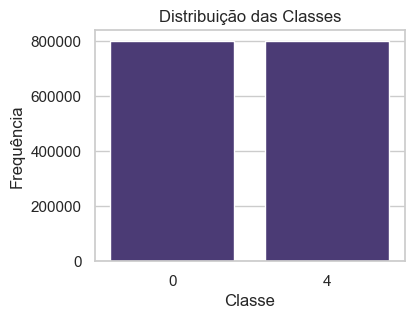

target
0    800000
4    800000
Name: count, dtype: int64

In [38]:
# Plotar a distribuição das classes usando Seaborn
plt.figure(figsize=(4, 3))
sns.countplot(x='target', data=df)
plt.title('Distribuição das Classes')
plt.xlabel('Classe')
plt.ylabel('Frequência')
plt.show()
df['target'].value_counts()

### 4.2. Análise de Texto
- Entender melhor as características do texto, como comprimento médio dos tweets, entendendo a distribuição do comprimento dos tweets.
- Com as Stopwords removidas podemos verificar as palavras mais frequentes.

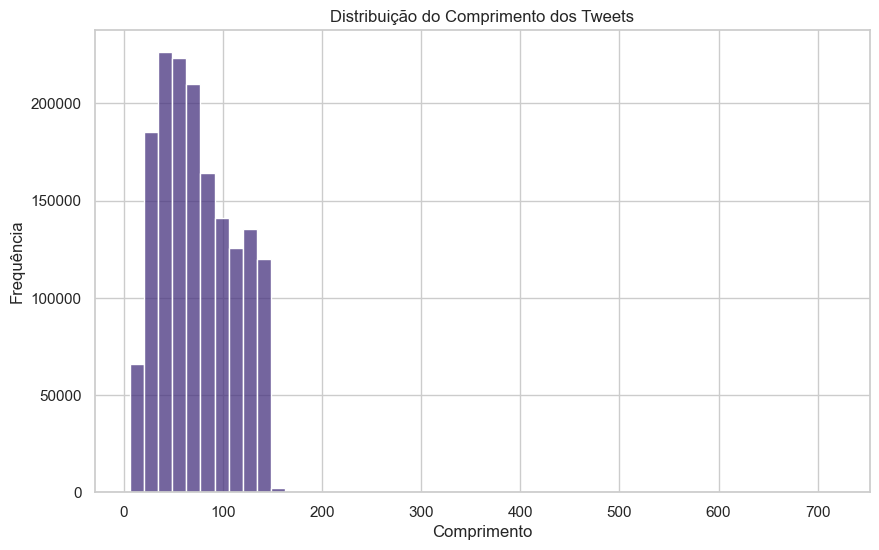

In [40]:
# Adicionar uma nova coluna 'tweet_length' com o comprimento dos tweets
df['tweet_length'] = df['text'].apply(len)

# Plotar a distribuição do comprimento dos tweets usando Seaborn
plt.figure(figsize=(10, 6))
sns.histplot(df['tweet_length'], bins=50, kde=False)
plt.title('Distribuição do Comprimento dos Tweets')
plt.xlabel('Comprimento')
plt.ylabel('Frequência')
plt.show()

### Conclusões:
- Este gráfico nos mostra que o comprimento dos tweets geralmente fica entre 0 a 100 caracteres, com uma média e mediana por volta dos 40 a 50 caracteres, indicando que a maioria das mensagens tem este comprimento. Foi observado também mensagens com mais caracteres (outliers)


### Núvem de Palavras mais Frequentes


In [11]:
from collections import Counter

In [44]:
# Palavras Mais Frequentes
df['clean_text'] = df['clean_text'].astype(str).fillna('')  # Converter para string e substituir NaN por string vazia
all_words = ' '.join(df['clean_text']).split()
word_freq = Counter(all_words)
common_words = word_freq.most_common(20)
print("Palavras mais frequentes:", common_words)

Palavras mais frequentes: [('day', 104563), ('good', 89507), ('get', 85924), ('like', 79096), ('go', 77465), ('got', 69832), ('love', 66984), ('work', 66476), ('today', 66103), ('going', 64098), ('time', 63796), ('back', 56118), ('one', 55882), ('lol', 55213), ('know', 53245), ('really', 49541), ('im', 49309), ('want', 48286), ('see', 46055), ('night', 43552)]


In [45]:
from wordcloud import WordCloud

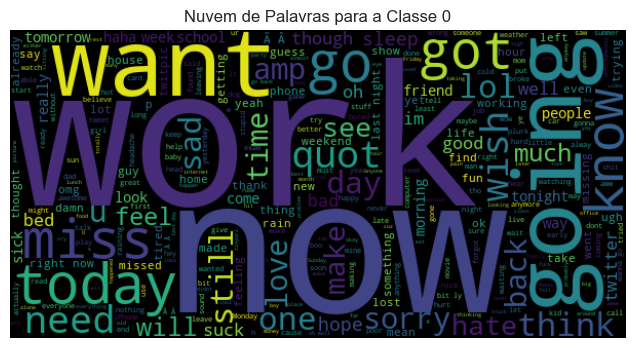

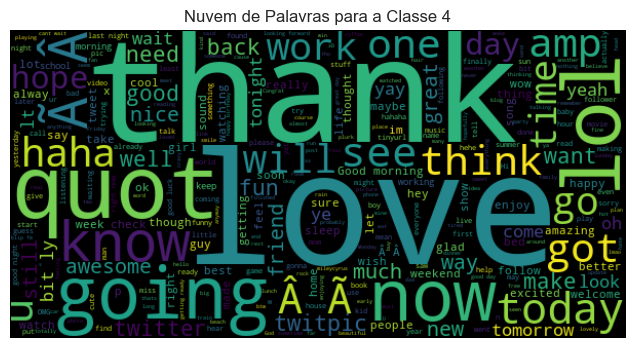

In [46]:
# Nuvem de palavras para cada classe
for label in df['target'].unique():
    subset = df[df['target'] == label]
    wordcloud = WordCloud(width=600, height=300, max_words=300).generate(' '.join(subset['text']))
    plt.figure(figsize=(8, 4))
    plt.title(f'Nuvem de Palavras para a Classe {label}')
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

### Conclusões Wordcloud:
Este gráfico nos mostra as palavras mais frequentes durante o período de tempo em que temos os dados, é notório que para a classe positiva temos palavras como amor, gratidão, e para a classe negativa uma importância do trabalho e o imediatismo.

### Frequência dos Tweets ao Longo do Tempo


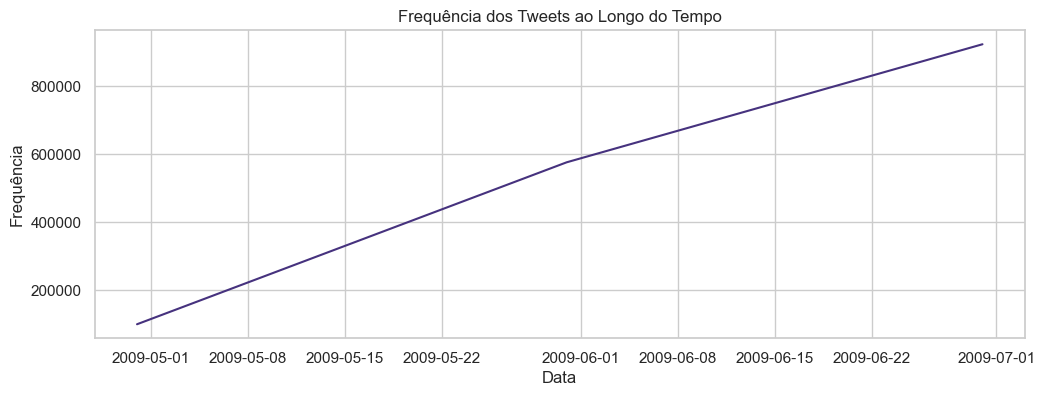

In [49]:
# Certifique-se de que a coluna 'date' está no formato datetime
df['date'] = pd.to_datetime(df['date'])

# Agrupar os dados por mês
df_lineplot = df.set_index('date')
tweets_per_month = df_lineplot['target'].resample('M').count()

# Plotar a frequência dos tweets ao longo do tempo usando Seaborn
plt.figure(figsize=(12, 4))
sns.lineplot(x=tweets_per_month.index, y=tweets_per_month.values)
plt.title('Frequência dos Tweets ao Longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Frequência')
plt.show()

### Distribuição dos Tweets por Hora


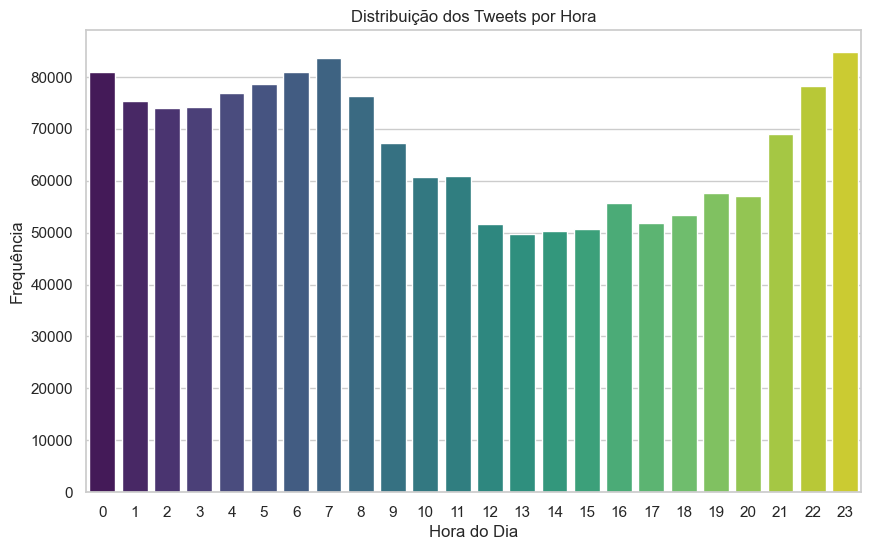

In [51]:
# Adicionar uma coluna 'hour' com a hora dos tweets
df['hour'] = df_lineplot.index.hour

# Plotar a distribuição dos tweets por hora usando Seaborn
plt.figure(figsize=(10, 6))
sns.countplot(x='hour', data=df, palette='viridis')
plt.title('Distribuição dos Tweets por Hora')
plt.xlabel('Hora do Dia')
plt.ylabel('Frequência')
plt.show()

### Distribuição dos Tweets por Dia da Semana


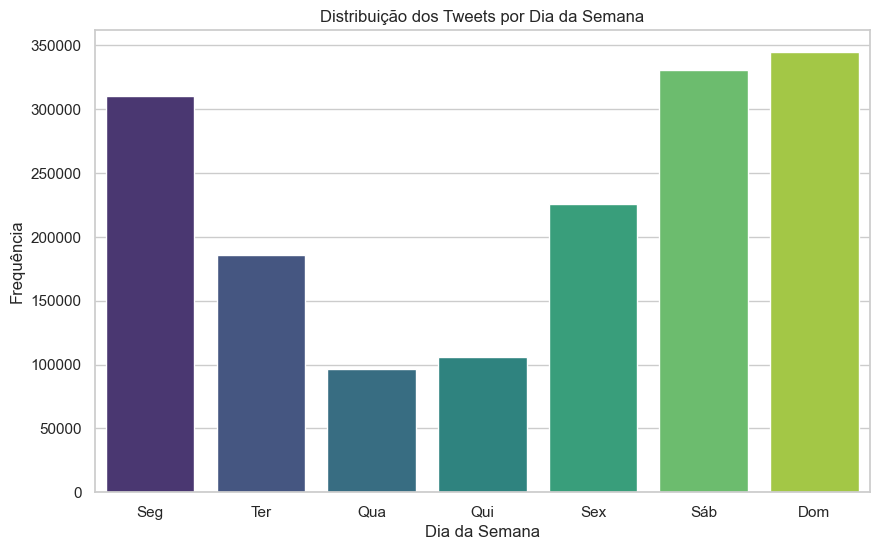

In [53]:
# Adicionar uma coluna 'day_of_week' com o dia da semana dos tweets
df['day_of_week'] = df_lineplot.index.dayofweek

# Plotar a distribuição dos tweets por dia da semana usando Seaborn
plt.figure(figsize=(10, 6))
sns.countplot(x='day_of_week', data=df, palette='viridis')
plt.title('Distribuição dos Tweets por Dia da Semana')
plt.xlabel('Dia da Semana')
plt.ylabel('Frequência')
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6], labels=['Seg', 'Ter', 'Qua', 'Qui', 'Sex', 'Sáb', 'Dom'])
plt.show()

### Distribuição dos Tweets por Mês


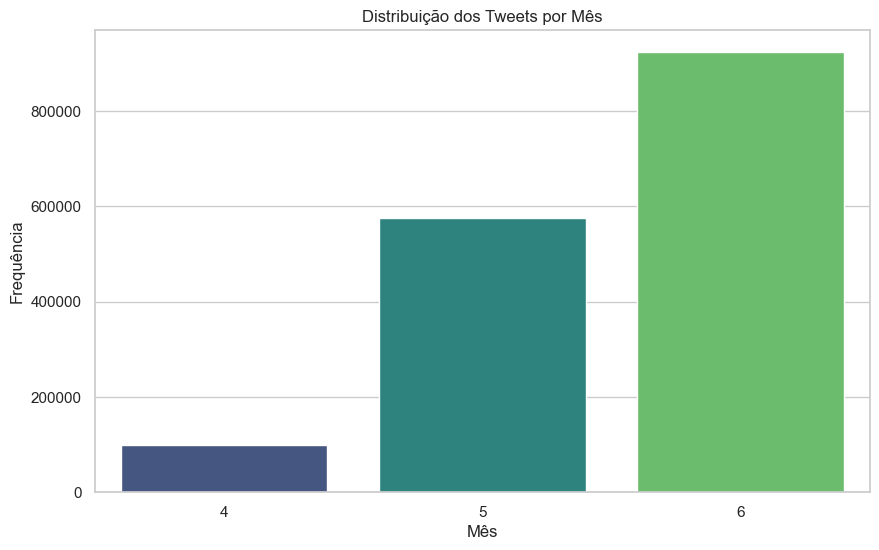

In [55]:
# Adicionar uma coluna 'month' com o mês dos tweets
df['month'] = df_lineplot.index.month

# Plotar a distribuição dos tweets por mês usando Seaborn
plt.figure(figsize=(10, 6))
sns.countplot(x='month', data=df, palette='viridis')
plt.title('Distribuição dos Tweets por Mês')
plt.xlabel('Mês')
plt.ylabel('Frequência')
plt.show()

### Comprimento Médio dos Tweets por Sentimento
- Podemos entender verificando se há diferença no comprimento dos tweets entre os sentimentos


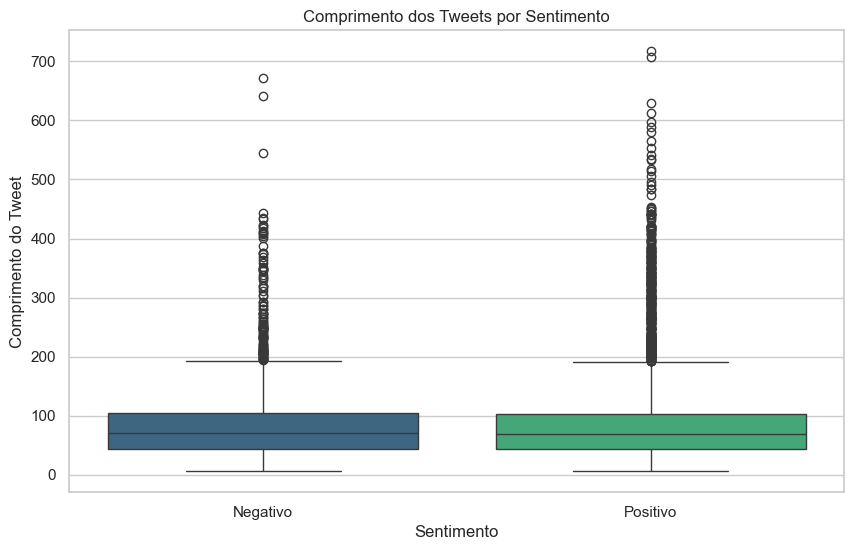

In [57]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='target', y='tweet_length', data=df, palette='viridis')
plt.title('Comprimento dos Tweets por Sentimento')
plt.xlabel('Sentimento')
plt.ylabel('Comprimento do Tweet')
plt.xticks(ticks=[0, 1], labels=['Negativo', 'Positivo'])
plt.show()

### Análise de Hashtags e Menções
- Hashtags Mais Frequentes por Sentiment


In [ ]:
import re
from collections import Counter

In [59]:
# Função para extrair hashtags
def extract_hashtags(text):
    return re.findall(r'#(\w+)', text)

# Adicionar coluna de hashtags
df['hashtags'] = df['text'].apply(extract_hashtags)

# Hashtags mais frequentes em tweets positivos
positive_hashtags = sum(df[df['target'] == 4]['hashtags'], [])
positive_hashtag_freq = Counter(positive_hashtags).most_common(20)

# Hashtags mais frequentes em tweets negativos
negative_hashtags = sum(df[df['target'] == 0]['hashtags'], [])
negative_hashtag_freq = Counter(negative_hashtags).most_common(20)

print("Hashtags mais frequentes em tweets positivos:", positive_hashtag_freq)
print("Hashtags mais frequentes em tweets negativos:", negative_hashtag_freq)

Hashtags mais frequentes em tweets positivos: [('followfriday', 1994), ('fb', 710), ('FF', 528), ('FollowFriday', 440), ('seb', 428), ('musicmonday', 369), ('ff', 349), ('1', 328), ('squarespace', 260), ('mcflyforgermany', 219), ('myweakness', 215), ('marsiscoming', 200), ('2', 184), ('delongeday', 161), ('mileymonday', 155), ('andyhurleyday', 153), ('asot400', 151), ('BSB', 138), ('iremember', 129), ('shaunjumpnow', 127)]
Hashtags mais frequentes em tweets negativos: [('fb', 1037), ('squarespace', 628), ('iranelection', 315), ('fail', 278), ('1', 191), ('inaperfectworld', 183), ('BSB', 161), ('2', 157), ('trackle', 144), ('iremember', 139), ('iPhone', 132), ('followfriday', 120), ('asot400', 113), ('dontyouhate', 103), ('iphone', 101), ('haveyouever', 98), ('tag', 92), ('IranElection', 92), ('f1', 91), ('e3', 79)]


### Análise de Bigramas e Trigramas
- Analisar bigramas (pares de palavras) e trigramas (trios de palavras) pode fornecer informações sobre as frases comuns nos tweets


In [61]:
from sklearn.feature_extraction.text import CountVectorizer

In [62]:
# Necessário eliminar quaisquer dados nulos dos textos limpos
df.fillna({'clean_text': 'Not Found'}, inplace=True)

# Função para plotar bigramas mais comuns
def plot_ngrams(text_data, ngram_range, title):
    vectorizer = CountVectorizer(ngram_range=ngram_range, stop_words='english')
    ngrams = vectorizer.fit_transform(text_data)
    ngrams_sum = ngrams.sum(axis=0)
    ngrams_freq = [(word, ngrams_sum[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
    ngrams_freq = sorted(ngrams_freq, key=lambda x: x[1], reverse=True)[:20]

    ngram_df = pd.DataFrame(ngrams_freq, columns=['Ngram', 'Frequência'])
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Frequência', y='Ngram', data=ngram_df, palette='viridis')
    plt.title(title)
    plt.xlabel('Frequência')
    plt.ylabel('Ngram')
    plt.show()

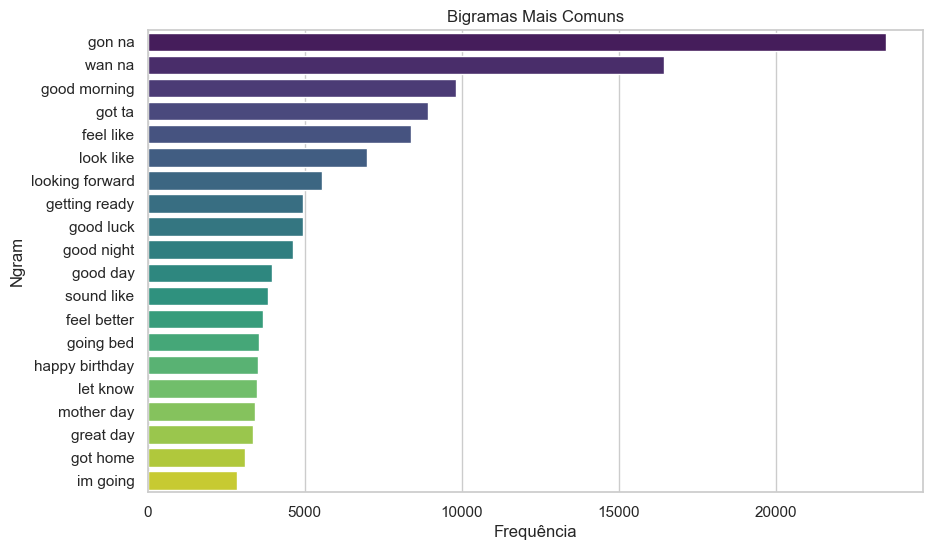

In [63]:
# Plotar bigramas mais comuns
plot_ngrams(df['clean_text'], (2, 2), 'Bigramas Mais Comuns')

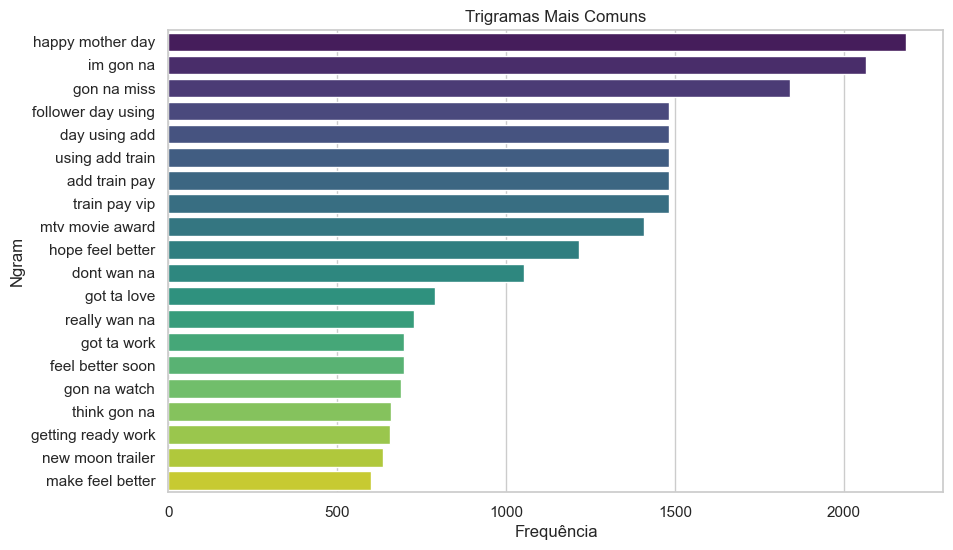

In [64]:
# Plotar trigramas mais comuns
plot_ngrams(df['clean_text'], (3, 3), 'Trigramas Mais Comuns')

### Análise de Emojis
- Se os tweets contêm emojis, pode ser interessante analisar a frequência e o tipo de emojis usados em diferentes classes


In [13]:
import emoji
from collections import Counter

Emojis mais frequentes em tweets positivos: [('©', 603), ('®', 293)]
Emojis mais frequentes em tweets negativos: [('©', 418), ('®', 196)]


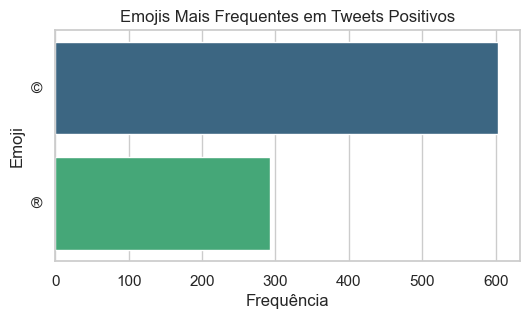

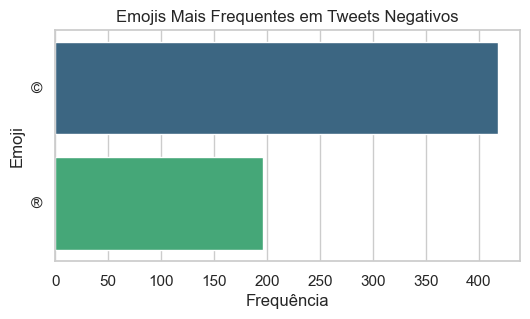

In [15]:
# Função para extrair emojis
def extract_emojis(text):
    return ''.join(c for c in text if emoji.is_emoji(c))

# Adicionar coluna de emojis
df['emojis'] = df['text'].apply(extract_emojis)

# Emojis mais frequentes em tweets positivos
positive_emojis = ''.join(df[df['target'] == 4]['emojis'])
positive_emoji_freq = Counter(positive_emojis).most_common(10)

# Emojis mais frequentes em tweets negativos
negative_emojis = ''.join(df[df['target'] == 0]['emojis'])
negative_emoji_freq = Counter(negative_emojis).most_common(10)

print("Emojis mais frequentes em tweets positivos:", positive_emoji_freq)
print("Emojis mais frequentes em tweets negativos:", negative_emoji_freq)

# Converter para DataFrame para visualização
positive_emoji_df = pd.DataFrame(positive_emoji_freq, columns=['Emoji', 'Frequência'])
negative_emoji_df = pd.DataFrame(negative_emoji_freq, columns=['Emoji', 'Frequência'])

# Plotar emojis mais frequentes
plt.figure(figsize=(6, 3))
sns.barplot(x='Frequência', y='Emoji', data=positive_emoji_df, palette='viridis')
plt.title('Emojis Mais Frequentes em Tweets Positivos')
plt.xlabel('Frequência')
plt.ylabel('Emoji')
plt.show()

plt.figure(figsize=(6, 3))
sns.barplot(x='Frequência', y='Emoji', data=negative_emoji_df, palette='viridis')
plt.title('Emojis Mais Frequentes em Tweets Negativos')
plt.xlabel('Frequência')
plt.ylabel('Emoji')
plt.show()

### Análise de Polaridade e Subjetividade

- Serão utilizadas técnicas de análise de sentimentos para explorar a polaridade (positiva/negativa) e a subjetividade (fato/opinião) dos tweets.
Correlação entre Comprimento e Sentimento

- Será verificado se há correlação entre o comprimento do tweet e o sentimento.

In [69]:
from textblob import TextBlob

In [70]:
def get_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity, blob.sentiment.subjectivity

In [71]:
# Aplicando a função get_sentiment
df[['polarity', 'subjectivity']] = df['clean_text'].apply(lambda x: pd.Series(get_sentiment(x)))

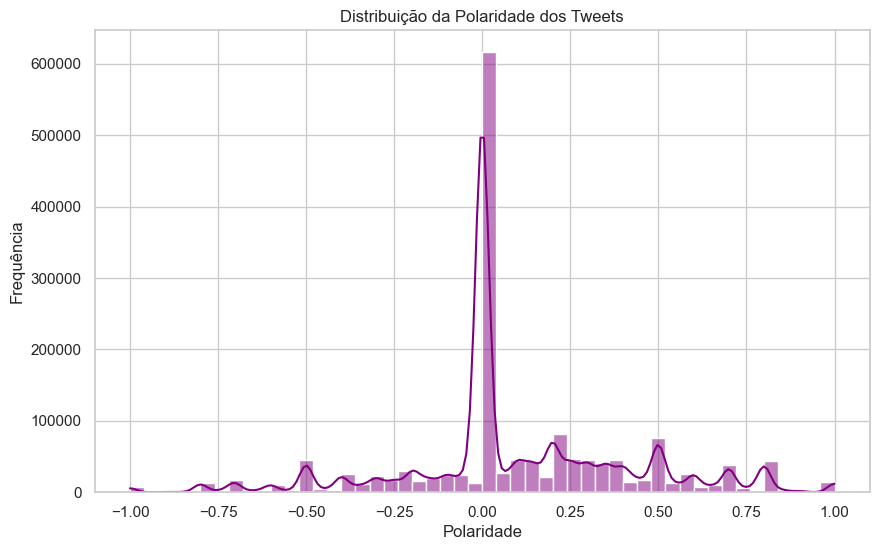

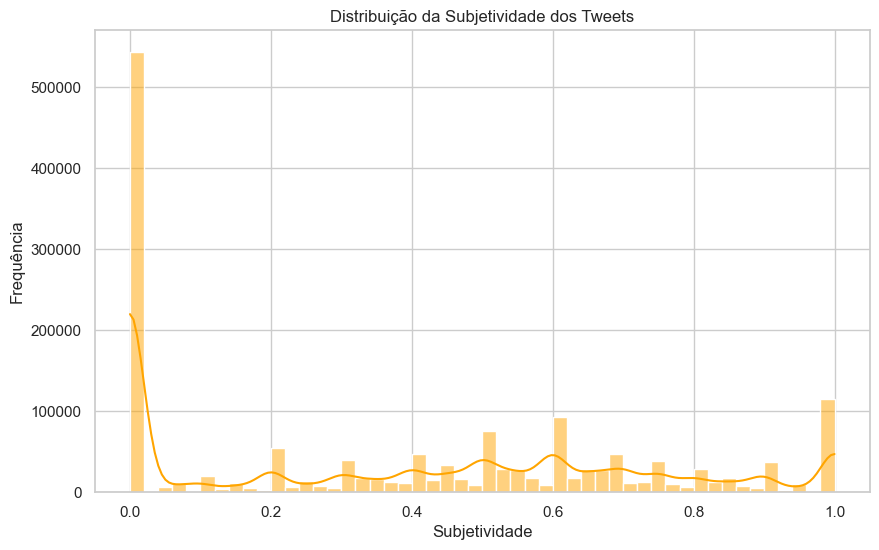

In [72]:
# Plotar a distribuição da polaridade
plt.figure(figsize=(10, 6))
sns.histplot(df['polarity'], bins=50, kde=True, color='purple')
plt.title('Distribuição da Polaridade dos Tweets')
plt.xlabel('Polaridade')
plt.ylabel('Frequência')
plt.show()

# Plotar a distribuição da subjetividade
plt.figure(figsize=(10, 6))
sns.histplot(df['subjectivity'], bins=50, kde=True, color='orange')
plt.title('Distribuição da Subjetividade dos Tweets')
plt.xlabel('Subjetividade')
plt.ylabel('Frequência')
plt.show()

### Análise de Frequência de Letras

- Analisar a frequência de letras pode ser interessante para verificar se há diferenças no uso de determinadas letras entre tweets positivos e negativos.

In [75]:
from collections import Counter
import string

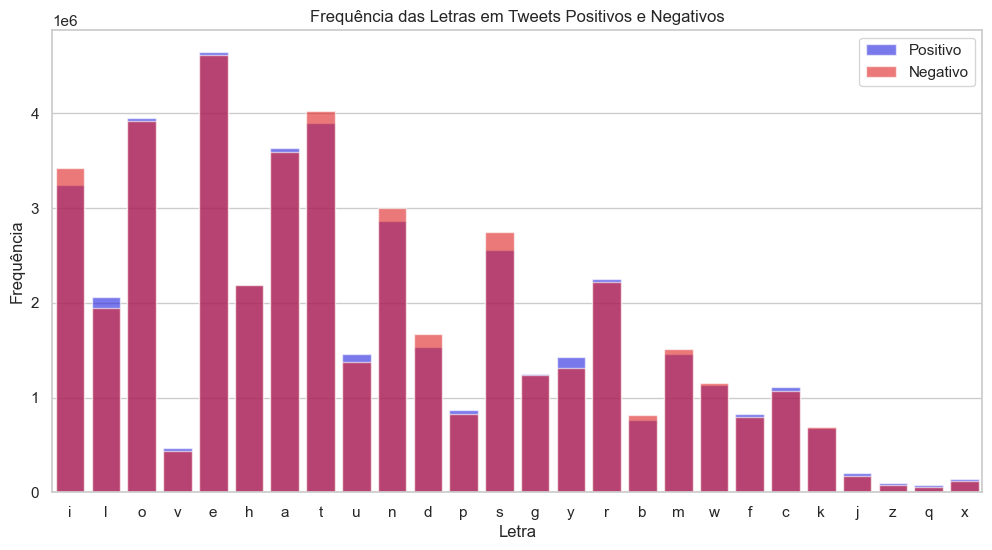

In [76]:
# Função para contar a frequência das letras
def letter_frequency(text):
    text = text.lower()
    text = ''.join([char for char in text if char in string.ascii_lowercase])
    return Counter(text)

# Contagem de frequência de letras em tweets positivos
positive_letters = ''.join(df[df['target'] == 4]['text'])
positive_letter_freq = letter_frequency(positive_letters)

# Contagem de frequência de letras em tweets negativos
negative_letters = ''.join(df[df['target'] == 0]['text'])
negative_letter_freq = letter_frequency(negative_letters)

# Converta os dados para DataFrame para visualização
positive_letter_df = pd.DataFrame(positive_letter_freq.items(), columns=['Letter', 'Frequency'])
negative_letter_df = pd.DataFrame(negative_letter_freq.items(), columns=['Letter', 'Frequency'])

# Plotar a frequência das letras
plt.figure(figsize=(12, 6))
sns.barplot(x='Letter', y='Frequency', data=positive_letter_df, color='blue', alpha=0.6, label='Positivo')
sns.barplot(x='Letter', y='Frequency', data=negative_letter_df, color='red', alpha=0.6, label='Negativo')
plt.title('Frequência das Letras em Tweets Positivos e Negativos')
plt.xlabel('Letra')
plt.ylabel('Frequência')
plt.legend()
plt.show()

### Análise de Similaridade de Texto

- Analisar a similaridade entre os tweets pode fornecer insights sobre temas ou tópicos comuns.



In [78]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Amostragem do conjunto de dados (ajuste o tamanho da amostra conforme necessário)
sample_size = 10000  # Escolha um tamanho de amostra que seu sistema possa suportar
df_sample = df.sample(n=sample_size, random_state=42)

# Criar o vetor TF-IDF para os textos amostrados
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(df_sample['clean_text'])

# Calcular a similaridade de cosseno para a amostra
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Mostrar a matriz de similaridade para alguns exemplos
print(cosine_sim[:10, :10])

[[1.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         1.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         1.         0.         0.         0.
  0.         0.07652886 0.         0.03146503]
 [0.         0.         0.         1.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         1.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         1.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  1.         0.         0.         0.        ]
 [0.         0.         0.07652886 0.         0.         0.
  0.         1.         0.         0.09503782]
 [0.         0.         0.         0.         0.         0.
  0.         0.         1.         0.        ]
 [0.         0.         0.03146503 0.

### Análise de Interações entre Usuários

- Analisar como os usuários interagem (menções e retweets) pode fornecer insights sobre a rede social dos tweet.


In [80]:
import re

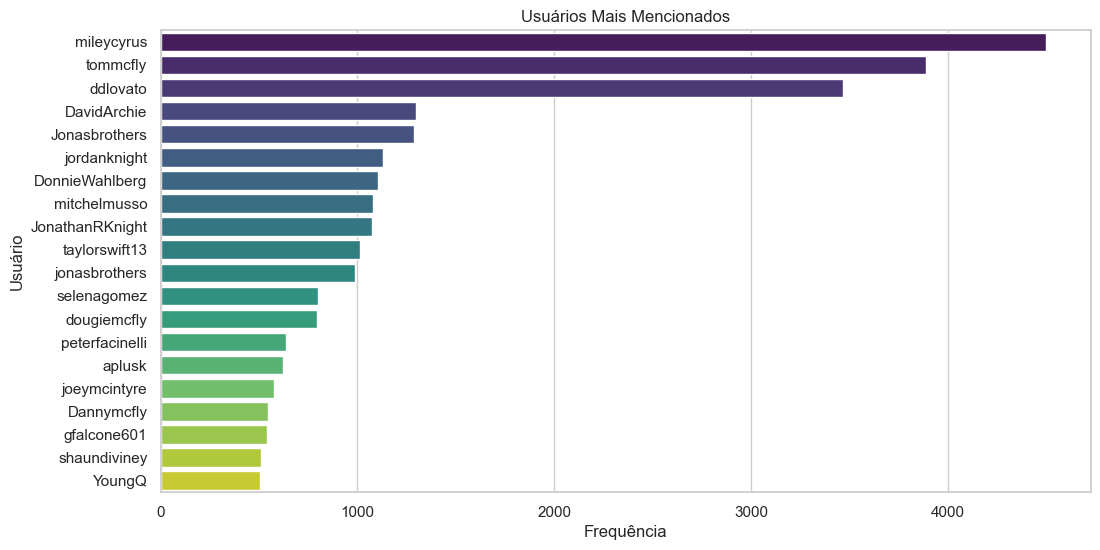

In [81]:
# Função para extrair menções
def extract_mentions(text):
    return re.findall(r'@(\w+)', text)

# Adicionar coluna de menções
df['mentions'] = df['text'].apply(extract_mentions)

# Menções mais frequentes
mentions = sum(df['mentions'], [])
mentions_freq = Counter(mentions).most_common(20)

# Converta os dados para DataFrame para visualização
mentions_df = pd.DataFrame(mentions_freq, columns=['User', 'Frequency'])

# Plotar as menções mais frequentes
plt.figure(figsize=(12, 6))
sns.barplot(x='Frequency', y='User', data=mentions_df, palette='viridis')
plt.title('Usuários Mais Mencionados')
plt.xlabel('Frequência')
plt.ylabel('Usuário')
plt.show()

### Salvando Mudanças Realizadas na EDA

In [83]:
# Salvar o DataFrame em um arquivo CSV
df.to_csv('140sentiment_tweets_eda.csv')

# 5. Criação das Pipelines para a Modelagem de Diferentes Algoritmos de Classificação com GridSearchCV;

- Inicialmente tentei uma abordagem em executar os algoritmos nas 1.6 milhões de instâncias porém está se provando algo extremamente lento de executar, farei uma abordagem com uma amostra de 1% dos dados `(16 mil instâncias)` selecionados aleatoriamente para garantir que não teremos vieses;
- A ideia central aqui será fazer uso da função `Pipeline` do sklearn para criar uma pipeline para cada algoritmo de classificação com seus pré-processamentos necessários para execução e tunagem de seus hiperparâmetros, por fim serão avaliadas suas métricas de performance;
- Ao final do projeto será comparada a performance entre os diferentes algoritos.


## Análise de Sentimentos

- A Análise de Sentimentos é uma forma específica de problema de `classificação` no campo do `Processamento de Linguagem Natural (NLP)`. Ela envolve a classificação de textos em categorias de sentimento, como positivo, negativo ou neutro. Esse tipo de análise é amplamente utilizado para entender opiniões e emoções expressas em textos, como avaliações de produtos, comentários em redes sociais, e feedback de clientes.

- No contexto de dados de tweets, como os presentes no dataset Sentiment140, cada tweet é rotulado automaticamente com base nos emoticons presentes nas postagens. Os sentimentos são classificados como positivos `(rotulados como 4)` ou negativos `(rotulados como 0)`.


In [3]:
# Imports para NLP
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Imports da pipeline, modelos e GridSearch para tunagem de hiperparâmetros
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

# Métricas de performance
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score

In [4]:
# Leitura dos dados
df = pd.read_csv('140sentiment_tweets_eda.csv',
                 encoding='latin1', 
                 dtype={'target':'int64',
                        'id':'int64',
                        'date':'object',
                        'flag':'object',
                        'user':'object',
                        'clean_text':'object',
                        'date':'object',
                        'hour':'object',
                        'day_of_week':'object',
                        'month':'object',
                        'hashtags':'object',
                        'emojis':'object',
                        'polarity':'float64',
                        'subjectivity':'float64', 
                        'mentions':'object'})

# Converter a coluna 'date' para datetime
df['date'] = pd.to_datetime(df['date'])

# Excluindo colunas desnecessárias
df.drop(['Unnamed: 0.1','Unnamed: 0'], axis='columns', inplace=True)

# Amostra aleatória de 3 registros do DataFrame
df.sample(3)

,target,id,date,flag,user,text,clean_text,tweet_length,hour,day_of_week,month,hashtags,polarity,subjectivity,mentions
1147416,4,1978068354,2009-05-30 22:21:38,NO_QUERY,MrEricPiRaTe,@jodabone go see @aivlysweetie she got some great birthday gifts,go see got great birthday gift,66,22,5,5,[],0.8,0.75,"['jodabone', 'aivlysweetie']"
791800,0,2326068892,2009-06-25 06:30:21,NO_QUERY,Anne714,heding home from vegas had a blast sad to see her go!,heding home vega blast sad see go,54,6,3,6,[],-0.5,1.00,[]
1130759,4,1975754494,2009-05-30 15:49:53,NO_QUERY,GinaMC096,Correction: I love them boys! &lt;3,correction love boy lt,36,15,5,5,[],0.5,0.60,[]


### Convertendo os sentimentos para binário (0 = negativo, 1 = positivo)


In [6]:
df['target'] = df['target'].apply(lambda x: 1 if x == 4 else 0)

### Tratando dados nulos 

In [8]:
df.fillna({'clean_text': 'Not Found'}, inplace=True)

In [9]:
df.isnull().sum() / len(df)

target          0.0
id              0.0
date            0.0
flag            0.0
user            0.0
text            0.0
clean_text      0.0
tweet_length    0.0
hour            0.0
day_of_week     0.0
month           0.0
hashtags        0.0
polarity        0.0
subjectivity    0.0
mentions        0.0
dtype: float64

### Selecionando 1% dos dados aleatoriamente


In [11]:
df_1percent = df.sample(int(len(df)*0.01))
len(df_1percent)

16000

### Divisão dos dados em Treino e Teste


In [13]:
X_train, X_test, y_train, y_test = train_test_split(df_1percent['clean_text'], df_1percent['target'], test_size=0.2, random_state=42)

## Pipeline para o algoritmo Naive Bayes
- `tfidf__max_df`: Define o limite superior de frequência dos termos para o `TfidfVectorizer`. Termos que ocorrem mais frequentemente do que o valor especificado serão ignorados na construção do vocabulário.

- `tfidf__ngram_range`: Define os tamanhos dos n-gramas a serem usados. Um `n-grama` é uma sequência contínua de n itens (palavras, caracteres, etc.) extraídos do texto.

- `clf__alpha`: Parâmetro de suavização de Laplace para o classificador Naive Bayes. Controla a força da suavização. Valores menores de alpha indicam uma suavização mais forte.

Fitting 3 folds for each of 12 candidates, totalling 36 fits
Naive Bayes Classification Report
              precision    recall  f1-score   support

           0       0.71      0.79      0.75      1606
           1       0.76      0.67      0.71      1594

    accuracy                           0.73      3200
   macro avg       0.74      0.73      0.73      3200
weighted avg       0.74      0.73      0.73      3200



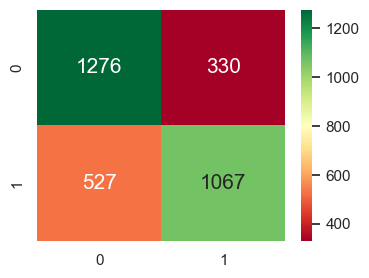

In [15]:
# Criação do pipeline com TF-IDF e Naive Bayes
pipeline_nb = Pipeline([('tfidf', TfidfVectorizer()),
                        ('clf', MultinomialNB())])

# Parâmetros para GridSearchCV
param_grid_nb = {'tfidf__max_df': [0.75, 1.0],
                 'tfidf__ngram_range': [(1, 1), (1, 2)],
                 'clf__alpha': [0.01, 0.1, 1.0]}

# GridSearchCV para encontrar os melhores parâmetros
grid_search_nb = GridSearchCV(pipeline_nb, param_grid_nb, cv=3, n_jobs=-1, verbose=1)
grid_search_nb.fit(X_train, y_train)

# Melhor modelo
best_model_nb = grid_search_nb.best_estimator_

# Predição e avaliação
y_pred_nb = best_model_nb.predict(X_test)

# Matriz de Confusão
matriz_confusao = confusion_matrix(y_test, y_pred_nb)
plt.figure(figsize=(4,3))
sns.heatmap(matriz_confusao, annot=True, fmt='d', cmap='RdYlGn', annot_kws={'fontsize': 15})

# Mostrando o relatório de classificação
print("Naive Bayes Classification Report")
print(classification_report(y_test, y_pred_nb))

**Análise de Erros: Naive Bayes**

- Analisar erros de classificação pode fornecer insights sobre onde os modelos estão falhando e como eles podem ser melhorados.

In [17]:
# Análise de Erros de classificação
misclassified = X_test[y_test != y_pred_nb]
true_labels = y_test[y_test != y_pred_nb]
pred_labels = y_pred_nb[y_test != y_pred_nb]

for text, true, pred in zip(misclassified[:10], true_labels[:10], pred_labels[:10]):
    print(f'Text: {text}')
    print(f'True Label: {true}, Predicted Label: {pred}')
    print('---')

Text: okay close friend cause say lol yes take vomit throw cont
True Label: 0, Predicted Label: 1
---
Text: whatever lol ya see
True Label: 0, Predicted Label: 1
---
Text: think speaking redundantly p hahahah big word kno
True Label: 0, Predicted Label: 1
---
Text: quotit nice meeting difficult forget youquot like unfair grrr
True Label: 0, Predicted Label: 1
---
Text: awesome glad hear lawn good r driving back bonita spring srq si life hr away think
True Label: 0, Predicted Label: 1
---
Text: quite grasped
True Label: 0, Predicted Label: 1
---
Text: di ujung banget berlawanan arah sama dufan next time kamu mudik go
True Label: 1, Predicted Label: 0
---
Text: enjoy beach day back michigan pool last vacation day
True Label: 1, Predicted Label: 0
---
Text: shock facebook quotstatusquot short film month
True Label: 0, Predicted Label: 1
---
Text: oh noticed thought spent time reinstalling browser addons lol maybe
True Label: 1, Predicted Label: 0
---


### Pipeline para o algoritmo Support Vector Machines (SVM)

- `tfidf__max_df`: Este parâmetro no TfidfVectorizer define o limite superior de frequência dos termos. Termos que ocorrem mais frequentemente do que o valor especificado serão ignorados na construção do vocabulário.
- `tfidf__ngram_range`: Define os tamanhos dos n-gramas a serem extraídos. Um n-grama é uma sequência contínua de n itens (palavras, caracteres, etc.) extraídos do texto.
- `clf__kernel`: Define o tipo de kernel a ser usado no algoritmo SVM. Pode ser 'linear', 'rbf' (radial basis function), entre outros. O kernel determina a função utilizada para transformar os dados de entrada em um formato adequado para o SVM.
- `clf__C`: Parâmetro de regularização do SVM. Controla o trade-off entre a maximização da margem e a minimização da classificação incorreta dos exemplos de treinamento. Valores menores de C especificam uma regularização mais forte.


Fitting 3 folds for each of 24 candidates, totalling 72 fits
SVM Classification Report
              precision    recall  f1-score   support

           0       0.72      0.76      0.74      1606
           1       0.74      0.71      0.73      1594

    accuracy                           0.73      3200
   macro avg       0.73      0.73      0.73      3200
weighted avg       0.73      0.73      0.73      3200



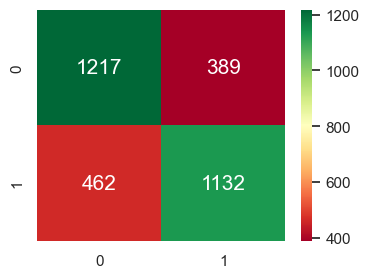

In [19]:
# Criação do pipeline com TF-IDF e SVM
pipeline_svm = Pipeline([('tfidf', TfidfVectorizer()),
                         ('clf', SVC())])

# Parâmetros para GridSearchCV
param_grid_svm = {'tfidf__max_df': [0.75, 1.0],
                  'tfidf__ngram_range': [(1, 1), (1, 2)],
                  'clf__kernel': ['linear', 'rbf'],
                  'clf__C': [0.1, 1, 10]}

# GridSearchCV para encontrar os melhores parâmetros
grid_search_svm = GridSearchCV(pipeline_svm, param_grid_svm, cv=3, n_jobs=-1, verbose=1)
grid_search_svm.fit(X_train, y_train)

# Melhor modelo
best_model_svm = grid_search_svm.best_estimator_

# Predição e avaliação
y_pred_svm = best_model_svm.predict(X_test)

# Matriz de Confusão
matriz_confusao = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(4,3))
sns.heatmap(matriz_confusao, annot=True, fmt='d', cmap='RdYlGn', annot_kws={'fontsize': 15})

# Mostrando o relatório de classificação
print("SVM Classification Report")
print(classification_report(y_test, y_pred_svm))

### Pipeline para o algoritmo de Regressão Logística
- `clf__C`: Parâmetro de regularização da regressão logística. Controla a força da regularização. Valores menores de C indicam uma regularização mais forte.

Fitting 3 folds for each of 16 candidates, totalling 48 fits
Logistic Regression Classification Report
              precision    recall  f1-score   support

           0       0.74      0.75      0.74      1606
           1       0.74      0.73      0.74      1594

    accuracy                           0.74      3200
   macro avg       0.74      0.74      0.74      3200
weighted avg       0.74      0.74      0.74      3200



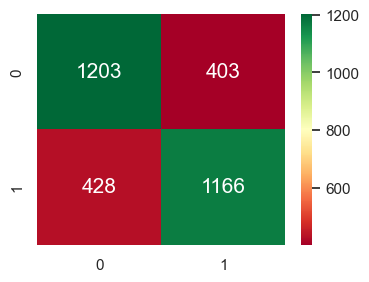

In [21]:
# Criação do pipeline com TF-IDF e Logistic Regression
pipeline_lr = Pipeline([('tfidf', TfidfVectorizer()),
                        ('clf', LogisticRegression(max_iter=1000))])

# Parâmetros para GridSearchCV
param_grid_lr = {'tfidf__max_df': [0.75, 1.0],
                 'tfidf__ngram_range': [(1, 1), (1, 2)],
                 'clf__C': [0.01, 0.1, 1, 10]}

# GridSearchCV para encontrar os melhores parâmetros
grid_search_lr = GridSearchCV(pipeline_lr, param_grid_lr, cv=3, n_jobs=-1, verbose=1)
grid_search_lr.fit(X_train, y_train)

# Melhor modelo
best_model_lr = grid_search_lr.best_estimator_

# Predição e avaliação
y_pred_lr = best_model_lr.predict(X_test)

# Matriz de Confusão
matriz_confusao = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(4,3))
sns.heatmap(matriz_confusao, annot=True, fmt='d', cmap='RdYlGn', annot_kws={'fontsize': 15})

# Mostrando o relatório de classificação
print("Logistic Regression Classification Report")
print(classification_report(y_test, y_pred_lr))

### Pipeline para o algoritmo Gradient Boosting Machines (GBM)
- `clf__n_estimators`: Número de estimadores (árvores) a serem usados no XGBoost.
- `clf__max_depth`: Profundidade máxima de cada árvore no XGBoost. Controla a complexidade das árvores.


Fitting 3 folds for each of 24 candidates, totalling 72 fits
Gradient Boosting Classification Report
              precision    recall  f1-score   support

           0       0.74      0.68      0.70      1606
           1       0.70      0.75      0.73      1594

    accuracy                           0.72      3200
   macro avg       0.72      0.72      0.72      3200
weighted avg       0.72      0.72      0.72      3200



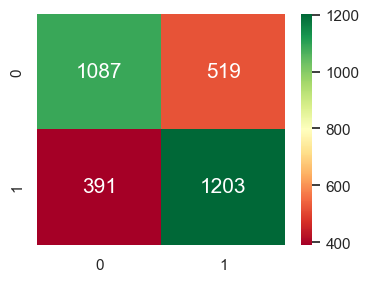

In [23]:
# Criação do pipeline com TF-IDF e XGBoost
pipeline_gbm = Pipeline([('tfidf', TfidfVectorizer()),
                         ('clf', XGBClassifier(use_label_encoder=False, eval_metric='logloss'))])

# Parâmetros para GridSearchCV
param_grid_gbm = {'tfidf__max_df': [0.75, 1.0],
                  'tfidf__ngram_range': [(1, 1), (1, 2)],
                  'clf__n_estimators': [100, 200],
                  'clf__max_depth': [3, 6, 10]}

# GridSearchCV para encontrar os melhores parâmetros
grid_search_gbm = GridSearchCV(pipeline_gbm, param_grid_gbm, cv=3, n_jobs=-1, verbose=1)
grid_search_gbm.fit(X_train, y_train)

# Melhor modelo
best_model_gbm = grid_search_gbm.best_estimator_

# Predição e avaliação
y_pred_gbm = best_model_gbm.predict(X_test)

# Matriz de Confusão
matriz_confusao = confusion_matrix(y_test, y_pred_gbm)
plt.figure(figsize=(4,3))
sns.heatmap(matriz_confusao, annot=True, fmt='d', cmap='RdYlGn', annot_kws={'fontsize': 15})

# Mostrando o relatório de classificação
print("Gradient Boosting Classification Report")
print(classification_report(y_test, y_pred_gbm))

## Pipeline para o algoritmo Random Forest Classifier

Será feita a validação cruzada para encontrarmos o melhor modelo com os seguintes parâmetros: 

- `tfidf__max_df`: Limita termos muito frequentes.
- `tfidf__ngram_range`: Define tamanhos de n-gramas.
- `clf__n_estimators`: Número de árvores no Random Forest.
- `clf__max_depth`: Profundidade máxima das árvores.


Fitting 3 folds for each of 24 candidates, totalling 72 fits
              precision    recall  f1-score   support

           0       0.73      0.68      0.71      1606
           1       0.70      0.75      0.73      1594

    accuracy                           0.72      3200
   macro avg       0.72      0.72      0.72      3200
weighted avg       0.72      0.72      0.72      3200



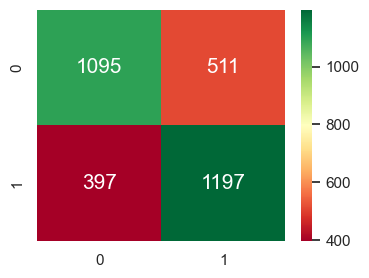

In [25]:
from sklearn.ensemble import RandomForestClassifier

# Criação do pipeline com TF-IDF e Random Forest
pipeline_rf = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf', RandomForestClassifier())])

# Parâmetros para GridSearchCV
param_grid_rf = {'tfidf__max_df': [0.75, 1.0],
              'tfidf__ngram_range': [(1, 1), (1, 2)],
              'clf__n_estimators': [100, 200],
              'clf__max_depth': [None, 10, 20]}

# GridSearchCV para encontrar os melhores parâmetros
grid_search_rf = GridSearchCV(pipeline_rf, param_grid_rf, cv=3, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# Melhor modelo
best_model_rf = grid_search.best_estimator_

# Predição e avaliação
y_pred = best_model_rf.predict(X_test)

# Matriz de Confusão
matriz_confusao = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4,3))
sns.heatmap(matriz_confusao, annot=True, fmt='d', cmap='RdYlGn', annot_kws={'fontsize': 15})

# Mostrando o relatório de classificação
print(classification_report(y_test, y_pred))

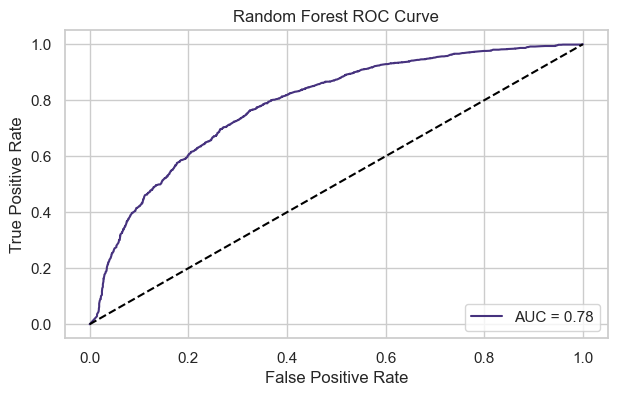

In [26]:
# Curva ROC e AUC
y_proba = best_model_rf.predict_proba(X_test)[:, 1]  # Probabilidades da classe positiva
fpr, tpr, _ = roc_curve(y_test, y_proba)
auc = roc_auc_score(y_test, y_proba)

plt.figure(figsize=(7, 4))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve')
plt.legend(loc='lower right')
plt.show()

## Conclusões
Inicialmente meu objetivo era trabalhar com tweets retirados diretamente do site em tempo real porém ao criar a conta de dev gratuita percebi que só posso realizar posts via código então decidi ir para algum dataset já conhecido. Futuramente existirão outros projetos em que utilizarei webscraping para a coleta das mensagens em tempo real.

Neste projeto busquei aprender e aplicar o máximo que pude dos diferentes tipos de processamentos de linguagem natural que foram possíveis de ser realizados nesses dados. A ideia central era demonstrar que é possível extrair informações valiosas a partir de mensagens trocadas por usuários.

Busquei aplicar a função `Pipeline` do sklearn para facilitar o pré-processamento e execução de diferentes modelos de machine learning, em meus projetos anteriores estava apenas rodando um modelo no final porém conforme minhas habilidades aumentam começo a entender agora na prática porque essa área se chama ciência de dados.

Os modelos foram executados com sucesso com técnicas de tunagem de hiperparâmetros e suas performances comparadas umas as outras.

Gostaria de agradecer por mais esse projeto concluído, pelo aprendizado e execução desta habilidade requerida que é o processamento de linguagem natural e me coloco a disposição para quaisquer esclarecimentos sobre o projeto.

Gustavo Silva Rios